In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.preprocessing import StandardScaler

tf.__version__

'2.3.0'

In [2]:
data_path = keras.utils.get_file("auto-mpg.data", 
                                 "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

rawdata.dropna(inplace=True)

data = rawdata.copy()

In [3]:
print(data['cylinders'].unique(), '\n', data['origin'].unique(), sep='')

[8 4 6 3 5]
[1 3 2]


In [4]:
data = pd.get_dummies(data, columns=['cylinders', 'origin'])

data.head(10)

,mpg,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,18.0,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,15.0,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,18.0,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,16.0,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,17.0,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0
5,15.0,429.0,198.0,4341.0,10.0,70,0,0,0,0,1,1,0,0
6,14.0,454.0,220.0,4354.0,9.0,70,0,0,0,0,1,1,0,0
7,14.0,440.0,215.0,4312.0,8.5,70,0,0,0,0,1,1,0,0
8,14.0,455.0,225.0,4425.0,10.0,70,0,0,0,0,1,1,0,0
9,15.0,390.0,190.0,3850.0,8.5,70,0,0,0,0,1,1,0,0


In [5]:
label = data.pop('mpg')

X, y = data.values, label.values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(294, 13) (98, 13) (294,) (98,)


In [7]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout

In [8]:
input = Input(shape=X_train.shape[1:])
x = Dense(256, activation='elu')(input)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
output = Dense(1)(x)

In [9]:
model = Model(inputs=input, outputs=output)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 256)               3584      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 46,849
Trainable params: 46,849
Non-trainable params: 0
__________________________________________________

In [10]:
history = model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
8/8 [==============================] - 0s 22ms/step - loss: 552.1137 - val_loss: 517.9444
Epoch 2/1000
8/8 [==============================] - 0s 6ms/step - loss: 416.1110 - val_loss: 331.6087
Epoch 3/1000
8/8 [==============================] - 0s 5ms/step - loss: 251.8919 - val_loss: 145.5545
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 128.1529 - val_loss: 93.6746
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 80.8589 - val_loss: 41.0442
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 40.0940 - val_loss: 21.7896
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 18.8776 - val_loss: 19.0659
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 16.6867 - val_loss: 15.2365
Epoch 9/1000
8/8 [==============================] - 0s 5ms/step - loss: 14.1092 - val_loss: 11.8059
Epoch 10/1000
8/8 [==============================] - 0s 5ms/step - loss: 11.9521 - val_loss:

In [11]:
from sklearn.metrics import r2_score

In [12]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.7940018536336078

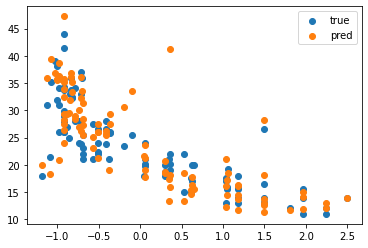

In [13]:
fig, ax = plt.subplots()
ax.scatter(X_test[:, 0], y_test, label = 'true')
ax.scatter(X_test[:, 0], y_pred, label = 'pred')
plt.legend()

plt.show()